In [1]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b

print(diff(f, a))

8*a**7 + 5*b - cos(c)


In [3]:
#найдем экстремумы функции z=x**3+y**3-3*x*y
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(x**2-y, 0)
eq2 = Eq(y**2-x, 0)
 
sol = solve([eq1, eq2], [x, y])
print(sol)

[(0, 0), (1, 1), ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2), ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]


# Оптимизация
функция Розенброка

In [4]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

Чтобы лучше понять, что из себя представляет данная функция, изобразим её график для случая двух переменных (тогда у нас будет три измерения, и график будет в 3D). В целом, можно было бы взять и большее количество переменных — несомненный плюс этой функции как раз и состоит в возможности использовать многомерные случаи любых размерностей. Однако случай для двух аргументов будет легко представить визуально.

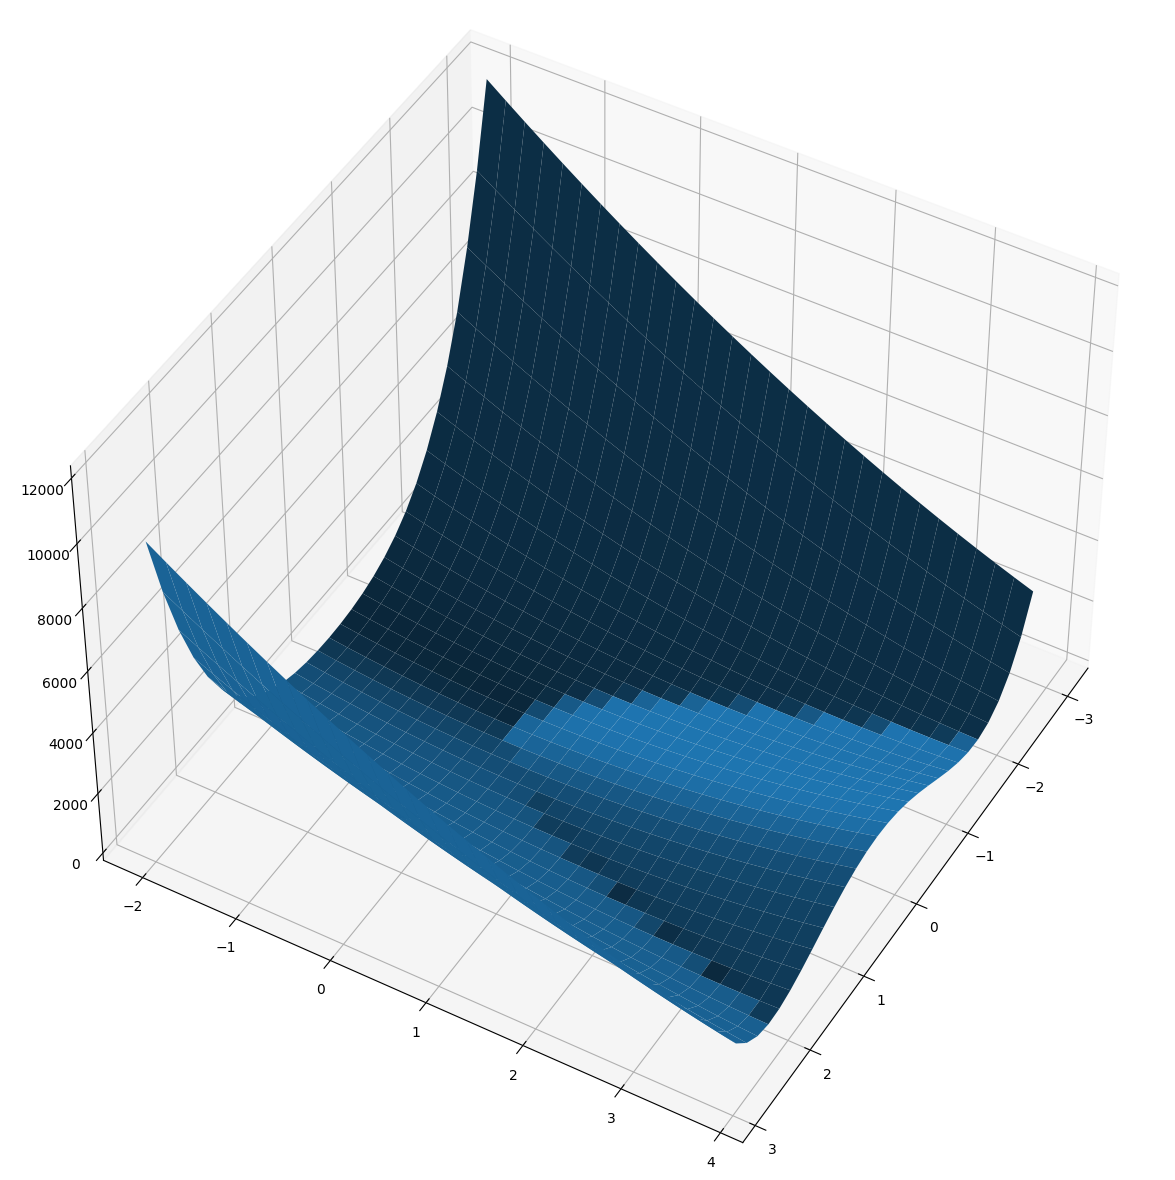

In [5]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Если внимательно посмотреть на график, можно увидеть долину параболической формы, о которой мы говорили ранее.

Теперь, когда нам доступно визуальное представление функции, давайте попробуем её оптимизировать. Начнём с простых методов.

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

In [6]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Итак, мы нашли точку минимума одним из методов. Теперь давайте используем для этого другой алгоритм.

Допустим, у нас есть некоторая точка  в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [7]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


заметьте, что результаты отличаются от полученных предыдущим методом, но это нормально
→ Симплекс-метод является стандартным методом линейного программирования  для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

# Задание 4.5

Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.
Для реализации этого алгоритма используется функция least_squares.
→ Мы используем этот метод, так как он хорошо подходит для задач безусловной оптимизации и считается методом первого выбора, если необходимо оптимизировать функцию, для которой нет ограничений.

In [9]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res =  least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


У нас есть два станка для производства пластиковых упаковок. Станки разных моделей, поэтому при их использовании получаются разные издержки, зависящие от произведённых упаковок и выражаемые следующими функциями:
g(a)=3a**2+a
g(b)=4b+5b**2
Здесь  a— это количество упаковок, произведённых на первом станке, а  b— количество упаковок, произведённых на втором станке.

Нам заказали 200 упаковок. Мы хотим выполнить заказ, минимизировав расходы на изготовление товаров. Чтобы узнать, как мы можем сэкономить, необходимо решить задачу оптимизации.

In [10]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [31]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
sols

[(1.00000000000000, 0.0, 0.707106781186548)]

In [32]:
result=(1-2)**2 + (0-1)**2
result

2

Прямоугольный параллелепипед имеет объём 1 куб. м
. Чему равна минимальная площадь его поверхности?

In [34]:
from sympy import *
x,y,c,w=symbols(' x y с w' )
g = 2*(x*y+x*c+c*y)
q = x*y*c - 1
f = (2*(x*y+x*c+c*y))+ w*(x*y*c - 1)
fx = f.diff(x)
fy = f.diff(y)
fc = f.diff(c)
fw = f.diff(w)
sols = solve([fx,fy,fc,fw],x,y,c,w)
sols

[(1, 1, 1, -4),
 (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I),
 (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]

In [35]:
min_square=2*(1*1+1*1+1*1)
min_square

6

In [36]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=np.float)
 
np.gradient(f)

C:\Users\админ\AppData\Local\Temp\ipykernel_8140\2777501286.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=np.float)


array([-6. ,  0. ,  0.5, -1.5,  1.5,  0. ,  4.5, 10. ])

In [38]:
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# Градиентный спуск

In [40]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [41]:
# определим функцию которая вычислит градиент
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [42]:
#Также запрограммируем простейший вариант для градиентного спуска:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [43]:
# функция для построения графика
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

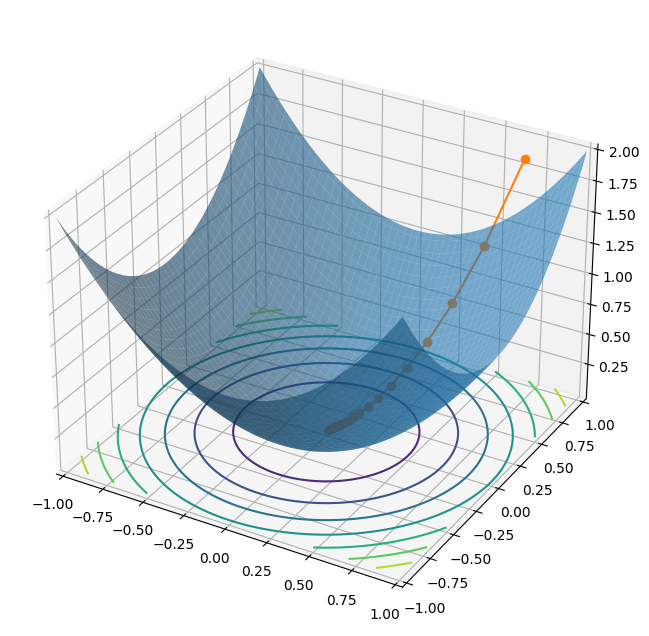

In [49]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)